In [2]:
import pandas as pd

# Define the file path
file_path = 'G:\\CAP_Guvi\\Leaf+Parameters+Trend.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Columns to remove
columns_to_remove = ['bat', 'rssi', 'snr', 'spreading factor', 'Device Name','Date','Time','spreading_factor']

# Remove the specified columns
df = df.drop(columns=columns_to_remove, errors='ignore')

# Optionally, save the modified DataFrame back to a CSV file
df.to_csv('G:\\CAP_Guvi\\Leaf_Parameters_Trend_new.csv', index=False)


In [1]:
import pandas as pd

# Load the dataset
file_path = 'G:\\CAP_Guvi\\Leaf_Parameters_Trend_new.csv'
df = pd.read_csv(file_path)

# Define the classification function based on the given thresholds
def classify_wetness(row):
    temperature = row['leaf_temperature']
    humidity = row['leaf_moisture']  # Assuming 'leaf_moisture' is the column for humidity

    # Dew condition
    if  temperature < 25 and 60 <= humidity <= 75:
        return 'dew'
    # Rainfall condition
    elif 20 <= temperature <= 30 and humidity > 80:
        return 'rainfall'
    # Irrigation condition
    elif 25 <= temperature <= 35 and 50 <= humidity <= 70:
        return 'irrigation'
    else:
        return 'unknown'  # For cases where the conditions don't match any category

# Apply the function to classify each row
df['class'] = df.apply(classify_wetness, axis=1)

# Save the updated dataset back to a CSV file
output_file_path = 'G:\\CAP_Guvi\\Leaf_Parameters_Trend_with_ClassificationNew.csv'
df.to_csv(output_file_path, index=False)


In [1]:
import pandas as pd

# Load the dataset
file_path = 'G:\\CAP_Guvi\\Leaf_Parameters_Trend_with_ClassificationNew.csv'
df = pd.read_csv(file_path)

# Remove rows where 'class' column has the value 'unknown'
df_cleaned = df[df['class'] != 'unknown']

# Optionally, save the cleaned dataframe to a new CSV file
df_cleaned.to_csv('G:\\CAP_Guvi\\Leaf_Parameters_new.csv', index=False)



### 1.Exploratory Data Analysis

In [1]:
# 1.Finding NULL value count in each column
import pandas as pd
df=pd.read_csv('G:\\CAP_Guvi\\Leaf_Parameters_new.csv')
df.isnull().sum()

Serial No.          0
leaf_moisture       0
leaf_temperature    0
health_status       0
class               0
dtype: int64

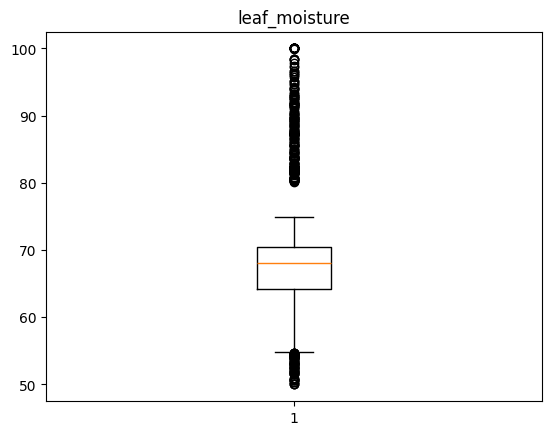

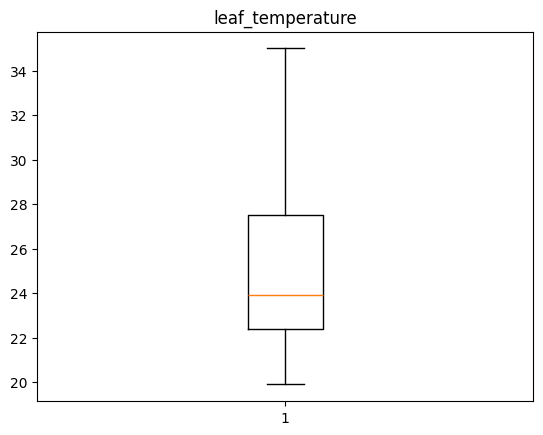

In [3]:
# 2.Visualize the Outliers of each column
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('G:\\CAP_Guvi\\Leaf_Parameters_new.csv')
plt.title('leaf_moisture')
plt.boxplot(df['leaf_moisture'])
plt.show()

plt.title('leaf_temperature')
plt.boxplot(df['leaf_temperature'])
plt.show()


# execute this code for each column in the dataset

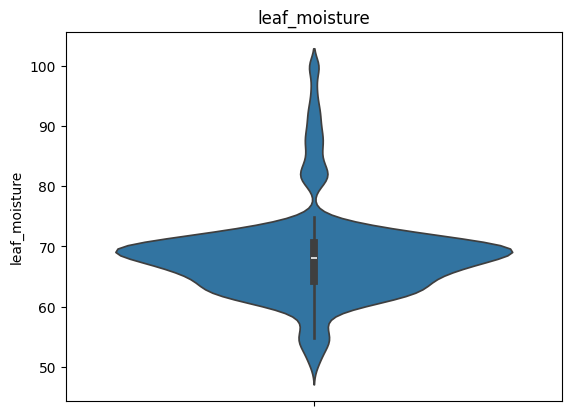

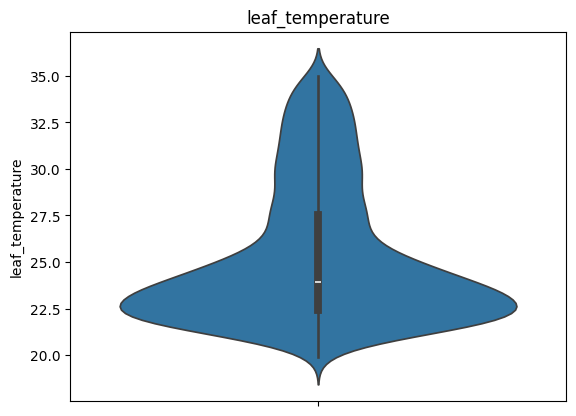

In [5]:
# 3.visualize the distribution of data in each column
#VISUALIZING SKEWNESS IN THE DATASET USING viloinplot()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Identifying outliers using violinplot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('G:\\CAP_Guvi\\Leaf_Parameters_new.csv')
plt.title('leaf_moisture')
sns.violinplot(df['leaf_moisture'])
plt.show()

plt.title('leaf_temperature')
sns.violinplot(df['leaf_temperature'])
plt.show()

# plot for each column in the dataset

### 2.Data Preprocessing

In [6]:
#1. Fix the Data Type of each attribute in the dataset
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3304 entries, 0 to 3303
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Serial No.        3304 non-null   int64  
 1   leaf_moisture     3304 non-null   float64
 2   leaf_temperature  3304 non-null   float64
 3   health_status     3304 non-null   object 
 4   class             3304 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 129.2+ KB


Serial No.            int64
leaf_moisture       float64
leaf_temperature    float64
health_status        object
class                object
dtype: object

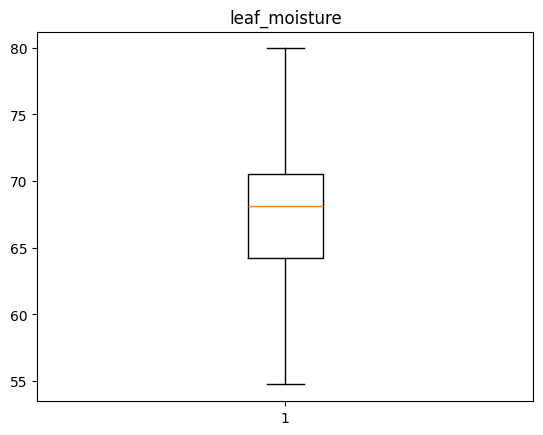

In [7]:
#2. Handling outliers 
Q1=df['leaf_moisture'].quantile(0.25)
Q3=df['leaf_moisture'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound

df.leaf_moisture=df.leaf_moisture.clip(lower_bound,upper_bound)
#After Handling outliers
plt.title('leaf_moisture')
plt.boxplot(df['leaf_moisture'])
plt.show()

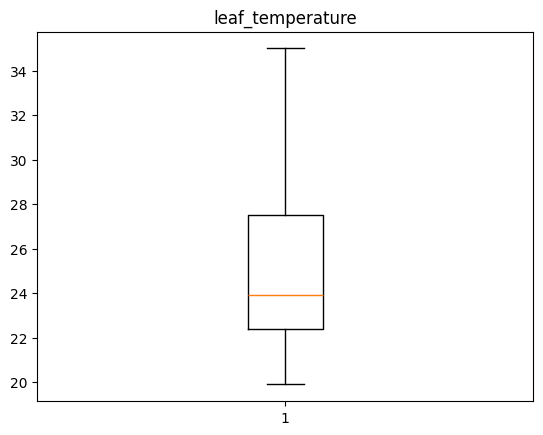

In [8]:
#2. Handling outliers 
Q1=df['leaf_temperature'].quantile(0.25)
Q3=df['leaf_temperature'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound

df.leaf_temperature=df.leaf_temperature.clip(lower_bound,upper_bound)
#After Handling outliers
plt.title('leaf_temperature')
plt.boxplot(df['leaf_temperature'])
plt.show()

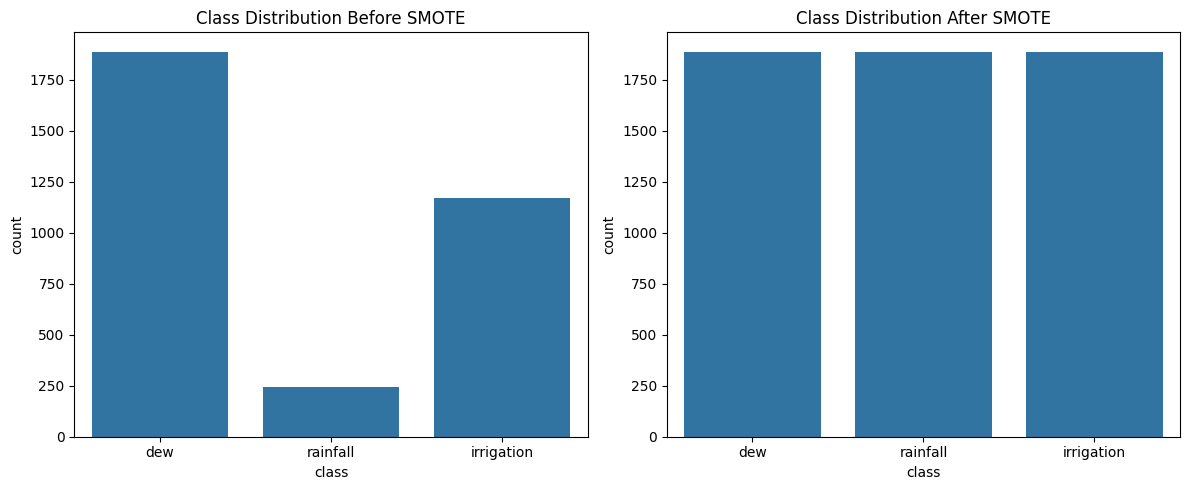

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the original dataset
df = pd.read_csv('G:\\CAP_Guvi\\Leaf_Parameters_catCrossEntro.csv')

# Plot the class distribution before SMOTE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='class', data=df)
plt.title("Class Distribution Before SMOTE")

# Split the data into features (X) and target (y)
X = df.drop(['class'], axis=1)
y = df['class']

# Perform SMOTE analysis to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target for plotting
resampled_df = X_resampled.copy()
resampled_df['class'] = y_resampled

# Plot the class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x='class', data=resampled_df)
plt.title("Class Distribution After SMOTE")

plt.tight_layout()
plt.show()
